In [1]:
import random
import time
import copy
import matplotlib.pyplot as plt
%matplotlib inline

#  sorting algorithms

In [2]:
def gen_rand_int(n):
    """
    generate random int array
    """
    arr = []
    for i in range(n):
        arr.append(random.randint(1,n))
    return arr

def timer(func):
    """
    timing decoration function
    """
    def wrap(*args):
        t0 = time.perf_counter()
        res = func(*args)
        t1 = time.perf_counter()
        cost = (t1-t0)
        print(f"time: {cost:0.4f} sec")
        return func.__name__, cost
    return wrap

@timer
def bubble_sort(arr):
    print('use bubble sort ...')
    for i in range(0, len(arr)):
        for j in range(1, len(arr)):
            if(arr[j] < arr[j-1]):
                arr[j], arr[j-1] = arr[j-1], arr[j]

@timer
def bubble_sort2(arr):
    print('use optimized bubble sort ...')
    for i in range(0, len(arr)):
        for j in range(1, len(arr)-i):
            if(arr[j] < arr[j-1]):
                arr[j], arr[j-1] = arr[j-1], arr[j]

@timer
def quick_sort(arr):
    print('use quick sort ...')
    s = []
    s.append((0, len(arr)))
    while(len(s)>0):
        e = s.pop()
        start, end = e[0], e[1]
        left, right = start, end-1
        pivot = arr[left]
        while(left < right):
            while (arr[right] >= pivot) & (left < right):
                right -= 1
            arr[left] = arr[right]
            while (arr[left] <= pivot) & (left < right):
                left += 1
            arr[right] = arr[left]
        arr[left] = pivot
        if (right-start) > 1:
            s.append((start, right+1))
        if (end - left) > 1:
            s.append((left+1, end))

@timer
def native_sort(arr):
    print('use python native sort ...')
    arr.sort()

In [3]:
arr1 = gen_rand_int(100)
arr2 = copy.copy(arr1)
arr3 = copy.copy(arr1)
arr4 = copy.copy(arr1)
# different ids of arrays represent different objects
print(id(arr1),id(arr2),id(arr3), id(arr4))

2534837960456 2534837959688 2534837960008 2534837960136


In [4]:
print('before sort:')
print('', arr1[:10], '\n', arr2[:10], '\n', arr3[:10], '\n', arr4[:10])

res1 = bubble_sort(arr1)
res2 = bubble_sort2(arr2)
res3 = quick_sort(arr3)
res4 = native_sort(arr4)

print('after sort:')
print('', arr1[:10], '\n', arr2[:10], '\n', arr3[:10], '\n', arr4[:10])

before sort:
 [17, 59, 70, 17, 93, 67, 55, 79, 69, 82] 
 [17, 59, 70, 17, 93, 67, 55, 79, 69, 82] 
 [17, 59, 70, 17, 93, 67, 55, 79, 69, 82] 
 [17, 59, 70, 17, 93, 67, 55, 79, 69, 82]
use bubble sort ...
time: 0.0009 sec
use optimized bubble sort ...
time: 0.0006 sec
use quick sort ...
time: 0.0002 sec
use python native sort ...
time: 0.0000 sec
after sort:
 [1, 1, 3, 4, 5, 5, 14, 15, 16, 16] 
 [1, 1, 3, 4, 5, 5, 14, 15, 16, 16] 
 [1, 1, 3, 4, 5, 5, 14, 15, 16, 16] 
 [1, 1, 3, 4, 5, 5, 14, 15, 16, 16]


Text(0, 0.5, 'Time(sec)')

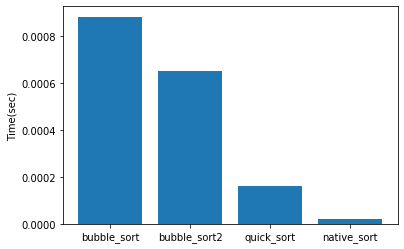

In [5]:
res = [res1, res2, res3, res4]
categories = [i[0] for i in res]
seconds = [i[1] for i in res]
plt.bar(categories, seconds)
plt.ylabel('Time(sec)')

# binary search

In [6]:
def b_search(arr, n):
    """
    binary search is based on a sorted array
    """
    start = 0
    end = len(arr) - 1
    while(start <= end):
        mid = (start + end) // 2
        if (arr[mid] < n):
            start = mid + 1
        elif (arr[mid] > n):
            end = mid - 1
        else:
            return mid

In [7]:
arr = gen_rand_int(100)
print(arr)
quick_sort(arr)

[64, 19, 98, 40, 78, 19, 22, 86, 35, 2, 56, 47, 80, 60, 18, 21, 89, 14, 88, 2, 37, 51, 63, 17, 16, 18, 97, 38, 99, 53, 34, 87, 39, 7, 38, 74, 8, 4, 55, 99, 89, 60, 40, 90, 40, 98, 39, 2, 5, 65, 21, 93, 29, 11, 87, 15, 6, 37, 60, 38, 26, 43, 84, 7, 81, 21, 24, 44, 91, 82, 21, 60, 70, 12, 39, 19, 2, 96, 23, 30, 38, 24, 35, 17, 8, 29, 57, 87, 14, 83, 67, 46, 65, 76, 67, 36, 30, 47, 88, 63]
use quick sort ...
time: 0.0002 sec


('quick_sort', 0.00017479999999991946)

In [8]:
print(arr)
for i in range(1, 30, 3):
    idx = b_search(arr, i)
    print('\n', idx, i)
    if idx is not None:
        print(' >>>', idx, i, arr[idx])

[2, 2, 2, 2, 4, 5, 6, 7, 7, 8, 8, 11, 12, 14, 14, 15, 16, 17, 17, 18, 18, 19, 19, 19, 21, 21, 21, 21, 22, 23, 24, 24, 26, 29, 29, 30, 30, 34, 35, 35, 36, 37, 37, 38, 38, 38, 38, 39, 39, 39, 40, 40, 40, 43, 44, 46, 47, 47, 51, 53, 55, 56, 57, 60, 60, 60, 60, 63, 63, 64, 65, 65, 67, 67, 70, 74, 76, 78, 80, 81, 82, 83, 84, 86, 87, 87, 87, 88, 88, 89, 89, 90, 91, 93, 96, 97, 98, 98, 99, 99]

 None 1

 4 4
 >>> 4 4 4

 8 7
 >>> 8 7 7

 None 10

 None 13

 16 16
 >>> 16 16 16

 22 19
 >>> 22 19 19

 28 22
 >>> 28 22 22

 None 25

 None 28
